## Project Description
The project provides a real-world dataset focusing on supply chain analytics. As the main data analyst for Just In Time, you will help solve key shipment and inventory management challenges, analyze supply chain inefficiencies, and create insightful dashboards to inform business stakeholders about potential problems and propose structural business improvements.

## Objective
In this project, my primary focus is on addressing key challenges related to shipment and inventory management within the supply chain. To achieve this goal efficiently, the project has been divided into few objectives:

# Data Preparation

In [2]:
# import the libraries
import pandas as pd
import numpy as np

In [3]:
# CONFIGURATION
RUN_DATE = "2026-01-13"
OUTPUT_FILE = "final_supply_chain_metrics.csv"
PRINT_TABLES = False


In [4]:
df_orders = pd.read_csv(
    r"D:\HARSHITHA_PROJECTS\Supplychain_Analyst\Supply-Chain-Analytics\Datasets\orders_and_shipments.csv",
    encoding="ISO-8859-1"
)

df_inventory = pd.read_csv(
    r"D:\HARSHITHA_PROJECTS\Supplychain_Analyst\Supply-Chain-Analytics\Datasets\inventory.csv"
)

df_fulfillment = pd.read_csv(
    r"D:\HARSHITHA_PROJECTS\Supplychain_Analyst\Supply-Chain-Analytics\Datasets\fulfillment.csv"
)


In [ ]:
print("Orders Data")
print("Rows:", df_orders.shape[0])
print("Columns:", df_orders.shape[1])

if df_orders.isnull().sum().sum() > 0:
    print("Missing values found in Orders data")

print("Inventory Data")
print("Rows:", df_inventory.shape[0])
print("Columns:", df_inventory.shape[1])

if df_inventory.isnull().sum().sum() > 0:
    print("Missing values found in Inventory data")

print("Fulfillment Data")
print("Rows:", df_fulfillment.shape[0])
print("Columns:", df_fulfillment.shape[1])

if df_fulfillment.isnull().sum().sum() > 0:
    print("Missing values found in Fulfillment data")

print("Data loaded successfully")


Orders Data
Rows: 30871
Columns: 24
Inventory Data
Rows: 4200
Columns: 4
Fulfillment Data
Rows: 118
Columns: 2
✅ Data loaded successfully


In [7]:
df_orders.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


In [8]:
df_inventory.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [9]:
df_fulfillment.head()

,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


The dataset provides three data tables including order_and_shipment, inventory and fulfillment. After examining the data fields, I noticed that the dataset generally represents the following key information

* Customer: General information about customers including identifiers and addresses

* Order: Information about the order including date of order, product and quantity ordered, order value

* Shipment: Shipping information including shipping date, shipping mode

* Product: Specific information about the ordered item including product name, product category, product department

* Warehouse Inventory: Information on inventory management for each product name including monthly inventory, warehouse location, storage costs, order fulfillment

# Data Cleaning

## Handling Missing Value

In [10]:
df_orders.isna().sum()

 Order ID                      0
 Order Item ID                 0
 Order YearMonth               0
 Order Year                    0
 Order Month                   0
 Order Day                     0
Order Time                     0
Order Quantity                 0
Product Department             0
Product Category               0
Product Name                   0
 Customer ID                   0
Customer Market                0
Customer Region                0
Customer Country               0
Warehouse Country              0
Shipment Year                  0
Shipment Month                 0
Shipment Day                   0
Shipment Mode                  0
 Shipment Days - Scheduled     0
 Gross Sales                   0
 Discount %                    0
 Profit                        0
dtype: int64

In [11]:
df_inventory.isna().sum()

Product Name               0
 Year Month                0
 Warehouse Inventory       0
Inventory Cost Per Unit    0
dtype: int64

In [12]:
df_fulfillment.isna().sum()

Product Name                            0
 Warehouse Order Fulfillment (days)     0
dtype: int64

All three datasets do not contain any missing values. So, there is no need to handle missing data imputation.

## Duplicated Data

In [13]:
df_orders.duplicated().sum()

np.int64(0)

In [14]:
df_inventory.duplicated().sum()

np.int64(0)

In [15]:
df_fulfillment.duplicated().sum()

np.int64(0)

Moreover, the absence of any duplicate values in all three datasets is also promising. This indicates that the data is fairly clean and ready for analysis.

# Data Wrangling

## Leading and Trailing Space

In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0    Order ID                    30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

In [17]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [18]:
df_fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


Upon inspecting the data using `.info()`, it has come to our attention that there are anomalies present in the datasets. Specifically, we have discovered that some columns contain leading or trailing spaces, which are not intended to be part of the column names.

In [19]:
# using strip fn removing unwanted spaces from columns name
dataframes = [df_inventory, df_orders, df_fulfillment]

for df in dataframes:
  df.columns = df.columns.str.strip()

In [20]:
df_orders.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')

In [21]:
df_inventory.columns

Index(['Product Name', 'Year Month', 'Warehouse Inventory',
       'Inventory Cost Per Unit'],
      dtype='object')

In [22]:
df_fulfillment.columns

Index(['Product Name', 'Warehouse Order Fulfillment (days)'], dtype='object')

In [23]:
df_orders.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')

In [24]:
df_orders['Discount %'].sample(30)

9460      0.05
4569       0.2
13623     0.07
1227      0.09
20423     0.05
24780     0.25
14751      -  
18794     0.02
9881      0.06
21318     0.05
5107       0.2
10158     0.07
1364       -  
28407     0.18
25055     0.07
23652      0.1
8022      0.06
26815     0.03
9435      0.04
3065      0.07
22925     0.07
21487     0.12
14950     0.06
29205     0.04
11992     0.13
18791      -  
291       0.13
5014       0.1
4640      0.04
10639     0.18
Name: Discount %, dtype: object

Based on above data, there are some rows with - values. Need to replace this - values with 0. In odrer to read this data properly.

In [25]:
# Convert the '-' values to 0 in the 'Discount %' column and then change the data type from object to float
df_orders['Discount %'] = df_orders['Discount %'].replace('  -  ', 0).astype(float)

In [26]:
df_orders.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')

In [27]:
df_orders['Discount %'] = df_orders['Discount %'].replace('  -  ', 0).astype(float)


In [ ]:
# Removing rows with missing values after all inspections
df_orders = df_orders.dropna()
df_inventory = df_inventory.dropna()
df_fulfillment = df_fulfillment.dropna()

print("Missing values removed")


✅ Missing values removed


## Feature Engineering :
Order Datetime & Shipment Datetime

Due to the data being separated into multiple columns for year, month, day, and time, resulting in a large number of columns, I have decided to combine these columns into a single column that includes all the necessary date and time information. This will help simplify the data and make it more manageable for further analysis in Tableau.

In [29]:
# Make new columns: Order Datetime and Shipment Datetime
df_orders['Order Datetime'] = pd.to_datetime(df_orders['Order Year'].astype(str) + '-' + df_orders['Order Month'].astype(str) + '-' + df_orders['Order Day'].astype(str) + ' ' + df_orders['Order Time'])
df_orders['Shipment Datetime'] = pd.to_datetime(df_orders['Shipment Year'].astype(str) + '-' + df_orders['Shipment Month'].astype(str) + '-' + df_orders['Shipment Day'].astype(str))

# Displaying the result
df_orders[['Order Datetime', 'Shipment Datetime']].head()

,Order Datetime,Shipment Datetime
0,2015-02-21 14:07:00,2015-02-27
1,2015-03-02 07:37:00,2015-03-06
2,2015-04-18 22:47:00,2015-04-20
3,2015-06-10 22:32:00,2015-06-12
4,2015-06-10 22:32:00,2015-06-12


In [30]:
# Drop unnecessary columns
df_orders.drop(columns=['Order Year', 'Order Month', 'Order Day', 'Order Time',
                        'Shipment Year', 'Shipment Month', 'Shipment Day'], inplace=True)

### Removing unwanted characters in country name

In [31]:
df_orders['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican\xa0Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d\x92Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Perú', 'Algeria\xa0', 'Ukraine', 'Belgium',
       'Philippines', 'Austria', 'Uruguay', 'Malaysia', 'Hong Kong',
       'Saudi Arabia', 'Switzerland', 'Irelan

In [32]:
#replace the special characters in the Customer Country column
df_orders['Customer Country'] = df_orders['Customer Country'].replace({
    'Dominican\xa0Republic': 'Dominican Republic',
    'Cote d\x92Ivoire': 'Cote d Ivoire', # Added a comma at the end of this line
    'Perú': 'Peru',
    'Algeria\xa0': 'Algeria',
    'Israel\xa0':'Israel',
    'Benín': 'Benin'
})
df_orders['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Peru', 'Algeria', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulga

# Data Manipulation

## Order Processing Time

The "`Order Processing Time`" is obtained by subtracting the "`Order Datetime`" from the "`Shipment Datetime`".

It measures the time taken for the order to move through various stages, including **processing, packing, and delivery preparation**, until it is ready for shipment.

This metric helps us understand how quickly we can fulfill customer orders and deliver products to their destination.

In [33]:
df_orders['Order Processing Time'] = (df_orders['Shipment Datetime'] - df_orders['Order Datetime']).dt.days
df_orders['Order Processing Time'] = df_orders['Order Processing Time'].apply(lambda x: 0 if x == -1 else x)

df_orders.sample(5)

,Order ID,Order Item ID,Order YearMonth,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Datetime,Shipment Datetime,Order Processing Time
7779,19336,48342,201510,1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,9430,Europe,Western Europe,Germany,USA,First Class,1,300,0.18,150,2015-10-10 05:54:00,2015-10-12,1
10208,27563,68997,201602,3,Outdoors,Golf Gloves,Bag Boy Beverage Holder,5600,Pacific Asia,Southeast Asia,Indonesia,Puerto Rico,Same Day,3,75,0.06,59,2016-02-07 08:11:00,2016-02-07,0
17812,41875,104530,201609,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,11046,Pacific Asia,West Asia,Turkey,USA,First Class,1,200,0.13,100,2016-09-03 06:19:00,2016-09-10,6
18614,67318,168259,201709,1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,3850,Europe,Western Europe,France,USA,Standard Class,4,300,0.10,150,2017-09-09 16:08:00,2016-11-03,-311
4633,23008,57593,201505,2,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,6660,Pacific Asia,Eastern Asia,China,USA,Standard Class,4,80,0.10,97,2015-05-10 02:47:00,2015-05-12,1


The presence of timestamps in the order of dates provides more accurate and detailed information about the time intervals between events. However, when calculating "`Order Processing Time`" using a timestamp, it can result in a negative value of 1 on same-day shipping as the order, because the shipping date does not have a timestamp, which is why the default timestamp of 00:00:00 is used.

To address this issue, we implemented a `lambda` function to set a negative value of 1 to 0, ensuring the calculated duration is not negative and meaningful for analysis. This approach allows us to gain valuable insights into the efficiency of the shipping process and delivery time, taking into account the time-sensitive nature of the data.

## KPI Calculations

In this section, key supply chain performance indicators (KPIs) are calculated using the cleaned and feature-engineered data.  
These KPIs help evaluate order processing efficiency, inventory utilization, and fulfillment performance, and are used to support operational and planning decisions.


In [35]:
print(df_inventory.columns)


Index(['Product Name', 'Year Month', 'Warehouse Inventory',
       'Inventory Cost Per Unit'],
      dtype='object')


In [36]:
# -----------------------------
# Order KPIs
# -----------------------------
avg_processing_time = df_orders['Order Processing Time'].mean()
on_time_orders = (df_orders['Order Processing Time'] <= 2).mean()

# -----------------------------
# Inventory KPIs (based on available columns)
# -----------------------------

# Average inventory level
avg_inventory = df_inventory['Warehouse Inventory'].mean()

# Total inventory value
total_inventory_value = (
    df_inventory['Warehouse Inventory'] * df_inventory['Inventory Cost Per Unit']
).sum()

# Inventory value per product (business-friendly KPI)
avg_inventory_value_per_product = total_inventory_value / df_inventory['Product Name'].nunique()

# -----------------------------
# Print KPI Results
# -----------------------------
print("Average Order Processing Time (days):", round(avg_processing_time, 2))
print("On-time Order Rate (%):", round(on_time_orders * 100, 2))
print("Average Inventory Level:", round(avg_inventory, 2))
print("Total Inventory Value:", round(total_inventory_value, 2))
print("Avg Inventory Value per Product:", round(avg_inventory_value_per_product, 2))


Average Order Processing Time (days): 2.59
On-time Order Rate (%): 53.33
Average Inventory Level: 16.91
Total Inventory Value: 86430.92
Avg Inventory Value per Product: 732.47


## KPI Visualizations

This section presents visual representations of the calculated KPIs.  
The charts help identify trends, patterns, and performance gaps across orders, inventory, and fulfillment processes.


### Order Processing Time Distribution

This chart shows the distribution of order processing times, helping to identify delays, bottlenecks, and variability in order fulfillment.


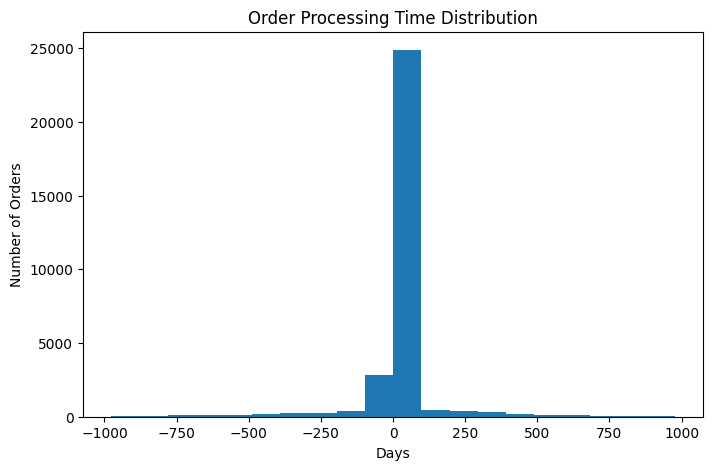

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_orders['Order Processing Time'], bins=20)
plt.title("Order Processing Time Distribution")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.show()


### Orders by Customer Country

This chart highlights the top customer countries by order volume, providing insights into geographic demand concentration.


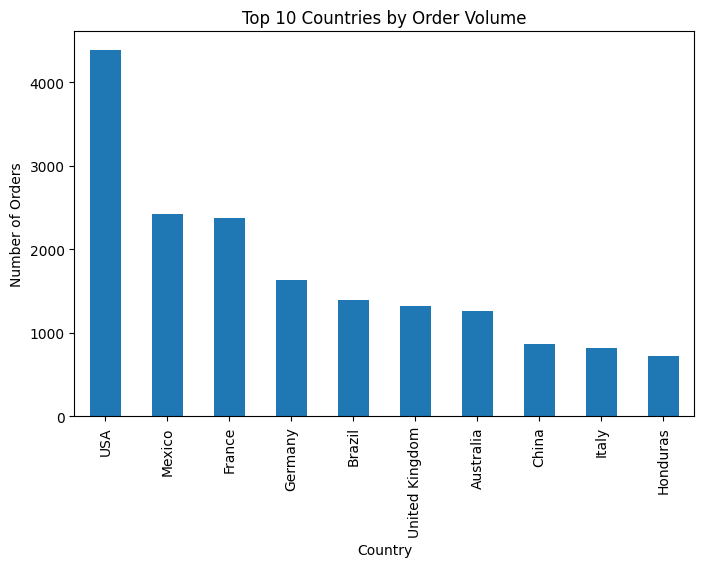

In [38]:
top_countries = df_orders['Customer Country'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Order Volume")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.show()


### Order Volume Trend Over Time

This chart illustrates how order volumes change over time, supporting demand trend analysis and capacity planning.


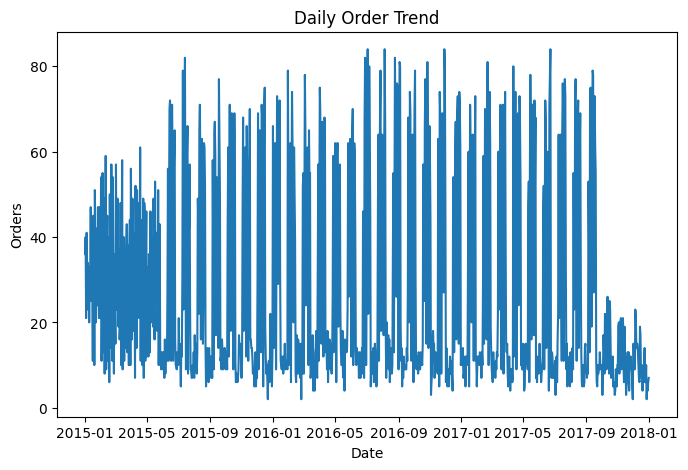

In [39]:
daily_orders = df_orders.groupby(df_orders['Order Datetime'].dt.date).size()

plt.figure(figsize=(8,5))
plt.plot(daily_orders.index, daily_orders.values)
plt.title("Daily Order Trend")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.show()


## Feature Metrics
The feature metrics that planning to create in tableau which helps to further analyze inventory management, Shipement delay and many more.

### Total Inventory Storage Cost

Total Cost of Inventory is a significant financial metric in supply chain management that calculates the overall cost associated with holding and managing inventory.

The formula for calculating Total Inventory Cost is: `Warehouse Inventory` times `Inventory Cost per Unit`.

#### Storage Cost
Storage_Cost = [Inventory Cost Per Unit]*[Warehouse Inventory]

### Shipment Delay

Shipment Delay is a metric that measures the time difference between the expected shipment date and the actual date that the order is delivered to the customer. This helps identify and measure the efficiency and reliability of the shipping processes.

The calculation of Shipment Delay involves comparing the `Shipment Days - Actual` (actual date the order is shipped) with the `Shipment Days - Scheduled` (the expected or planned date of shipment).

#### Shipment Delay in Days
Shipment Delay  = [Shipment Days - Actual] - ['Shipment Days - Scheduled']

### Profit Margin

Profit Margin helps to assessing the profitability of the supply chain operations. It provides insights into the effectiveness of cost control and pricing strategies, enabling organizations to make adjustments to enhance overall profitability.

Profit Margin : Total Profit / Total Gross Sales *100

### Inventory to Sales Delta

This is metric which indicating how efficiently inventory is managed and whether there may be overstocking or understocking issues, allowing for more informed decisions to optimize inventory levels.

Inventory to Sales Delta = Total Warehouse Inventory - Total Order Quantity

### Under or Overstock

Under or Overstock helps to find which products are Overstock and which are understock.
And it helps to the balance of inventory.

Under or Overstock = Inventory to Sales Delta >0 THEN 'Overstock'
ELSE 'Understock'

# Data Exporting & Conclusion

In [40]:
# Final Check
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order ID                   30871 non-null  int64         
 1   Order Item ID              30871 non-null  int64         
 2   Order YearMonth            30871 non-null  int64         
 3   Order Quantity             30871 non-null  int64         
 4   Product Department         30871 non-null  object        
 5   Product Category           30871 non-null  object        
 6   Product Name               30871 non-null  object        
 7   Customer ID                30871 non-null  int64         
 8   Customer Market            30871 non-null  object        
 9   Customer Region            30871 non-null  object        
 10  Customer Country           30871 non-null  object        
 11  Warehouse Country          30871 non-null  object        
 12  Ship

In [41]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1   Year Month               4200 non-null   int64  
 2   Warehouse Inventory      4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [42]:
df_fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product Name                        118 non-null    object 
 1   Warehouse Order Fulfillment (days)  118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


## Exporting Cleaned Data

Save the cleaned and processed DataFrames to a csv file for further visualization and analysis in tableau.

In [43]:
# Export DataFrames to CSV
df_orders.to_csv('orders_and_shipment.csv', index=False)
df_inventory.to_csv('inventory.csv', index=False)
df_fulfillment.to_csv('fulfillment.csv', index=False)

## Conclusion

Through this analysis, we successfully explored and performed data cleaning on the `df_orders` and `df_inventory` DataFrames. Important metrics such as `Profit Margin`, `Inventory to Sales Delta`, `Storage Cost`, and `Shipment Delay` will be calculated in tableau to understand inventory performance and supply chain efficiency for the company.

Additionally, we removed some anomalous data points that could impact the analysis results. The cleaned and processed data will be exported to a csv file for further analysis and visualization in Tableau.


# Closing

As an aspiring data engineer/data analyst, I will consistently look for opportunities to improve my skills and insights.Thank you so much.

This analysis was conducted as part of a competition organized by DataCamp, with the aim of demonstrating data analytics expertise and providing actionable insights to address real-world business challenges. Throughout this process, I strive to use effective data processing, data cleaning, and advanced analytics techniques to generate meaningful conclusions and support decision making.